#<font color='red'> Lesson 4 - Reading and Manipulating Fits Files

**by Alejandro Benitez-Llambay (alejandro.benitezllambay@unimib.it)** for the lab "Esperimentazioni di Astrofisica" at UNIMIB



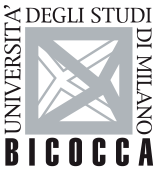


*Based on the Fits Primer by https://fits.gsfc.nasa.gov/fits_home.html, and the Documentation for the WFPC2 instrument on board of the Hubble Space Telescope (https://www.stsci.edu/hst/wfpc2/Wfpc2_dhb/intro_ch23.html).*

##<font color='red'> Introduction

**FITS** stands for Flexible Image Transport System (Sistema Flessibile per il Trasporto di Immagini), and, like many other file formats, it is an *Open Standard* that was defined by the International Astronomical Union soon after CCDs and other digital technologies took over analogic technologies (like photographic plates).      

If you are curious about it, *the* FITS Standard is defined here:

https://fits.gsfc.nasa.gov/standard40/fits_standard40aa-le.pdf

###<font color='red'>FITS Format: FITS are Formatted Binary Files</font>

Unlike formatted **TXT** files, **FITS** files are binary. However, data is stored following the FITS standard. This makes FITS **formatted** rather than unformatted files.

As FITS adhere to a standard format, they can be used to exchange digital data indpendent of *Hardware* and *Software*.

The **FITS** file format is made of various segments called `HEADER/DATA UNITS` (or HDUs for short), where the first **HDU** is called `Primary HDU`. Subsequent HDUs are usually called `Extensions`.

The Figure below summarizes the basic structure of a `FITS` file:


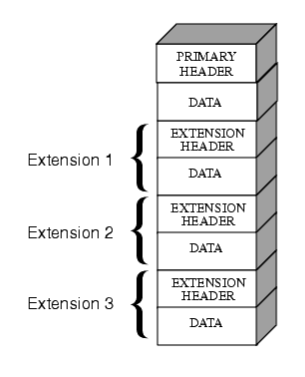

###<font color='red'>The Primary HDU</font>

The Primary HDU can contain a multidimensional data array of dimension between 0 and 999, of 1,2, or 4 byte integers or 4 or 8 floating-point numbers.

The primary HDU can store a 1D spectrum, a 2D image, a 3D data cube, or tabular data.

Any number of additional HDUs, called extensions, may follow the primary array. These extensions can be:

* <font color='green'>Image Extensions</font>: These store multi-dimensional
arrays of pixel data, similar to the primary array (but are stored in separate HDUs with the XTENSION = 'IMAGE' keyword).

* <font color='green'>ASCII Table Extensions</font>: These store tabular information in ASCII format, and are generally less efficient than binary tables but are more human-readable (XTENSION = 'TABLE').

* <font color='green'>Binary Table Extensions</font>: These store tabular data in a binary format, and each column can store arrays (usually 1-dimensional, but multi-dimensional arrays are often supported as a convention) (XTENSION = 'BINTABLE').


####<font color='red'>The Header </font>

Every HDU consists of an ASCII formatted `Header Unit` followed by an optional `Data Unit`.

Technical detail: Each Header or Data Unit is a **multiple of 2880 bytes long.**

The header unit is composed of 80-character keyword records, with each record following the general form:



```
KEYNAME = value / comment string
```

The keyword names can be up to 8 characters long and are uppercase with specific characters allowed (letters, numbers, hyphens, and underscores).

An equal sign (`=`) is used to separate the key and its value in the record. Values can be numbers, strings, or Boolean strings (either T or F).

There is a set of required keys that must always be present. These are:



```
SIMPLE  = T / file conforms to FITS standard
BITPIX  = 16 / number of bits per data pixel
NAXIS   = 2 / number of data axes
NAXIS1  = 440 / length of data axis 1
NAXIS2  = 300 / length of data axis 2
EXTEND  = T  / This is the final extensions?
END
```


The required keys may be followed by other optionals to describe other aspects of the data (e.g., the date and time of the observation, instrument, etc).

`COMMENT` or `HISTORY` keys are special keys that can be added to document the contents or changes of the data file. These are special in the sense that no equal sign is required after them.

The last keyword in the header is always `END`, which has no value nor comment fields.


Regarding the `BITPIX` key, this specifies the number of bits per data value and the data type in the FITS file, as follows:

<table>
  <tr>
    <th>BITPIX Value</th>
    <th>Data Type</th>
  </tr>
  <tr>
    <td>8</td>
    <td>Unsigned 8-bit integer</td>
  </tr>
  <tr>
    <td>16</td>
    <td>Signed 16-bit integer</td>
  </tr>
  <tr>
    <td>32</td>
    <td>Signed 32-bit integer</td>
  </tr>
  <tr>
    <td>-32</td>
    <td>32-bit floating-point</td>
  </tr>
  <tr>
    <td>-64</td>
    <td>64-bit floating-point</td>
  </tr>
</table>



The Minimal Header structure is shown in the next Figure. The 6 header units are 80-bytes long each, making a total of 480 bytes stored at the beginning of the file. The rest of the file is then filled with NULL characters until a total of 2880 bytes are written.

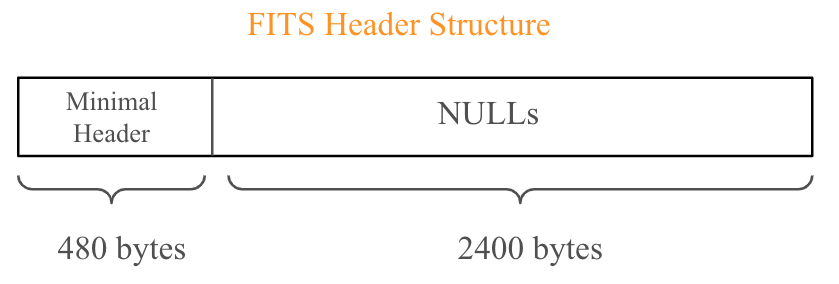

####<font color='red'>Data Units
 </font>

 The data unit may or may not be present. If present, it follows after the last block of 2880 bytes of the header. As the previous Figure shows, if no enough bytes are required for the header, the remaning space is filled with `ASCII` `NULLs`, so that the first byte after the last block of 2880 bytes of the header is the first data entry.

 Image or Table data can have any of the data types defined by `BITPIX` above.

##<font color='red'> Writing and Reading Fits Files

Following the standard it is possible to write our own functions to write and read FITS files. However, there are already well-tested functions that can do this for us in Python. One is `astropy`

https://www.astropy.org/


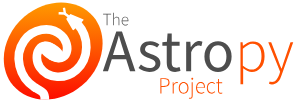

###<font color='red'> Write an image to a FITS file

To write any image data to a FITs file, we can use `Astropy` as follows:

In [ ]:
import numpy as np
from astropy.io import fits

# Step 1: Create a random 2D image
random_image = np.random.random((100, 100))

# Step 2: Create a FITS HDU (Header/Data Unit)
hdu = fits.PrimaryHDU(random_image)

# Step 3: Write the FITS file
hdu.writeto('random_image.fits', overwrite=True)

print("FITS file 'random_image.fits' created successfully!")

FITS file 'random_image.fits' created successfully!


In the previous example,

*   Step 1 generates a 100x100 array of random 64-bit floating-point numbers between 0 and 1
*   Step 2 creates the FITS' `Primary HDU` to store the image data
*   Step 3 writes the HDU to a file. The `overwrite=True` ensures existing files with the same name are replaced.

###<font color='pink'> Exercise 1 </font>


1.   Download the FITS file written with the previous code and open it with JS9, an online tool to display astronomical images everywhere: https://js9.si.edu/.

2. Write the image using different resolutions (or encode other information in it) and visualize it with `js9`.

3.   Using any text reader, open the FITS file. Check and understand its Header.


---



###<font color='red'> Read an image stored in a FITS file

To quickly inspect the FITS file using Python, we can read it using Astropy as follows:


In [ ]:
from astropy.io import fits

# Open and read the FITS file.
hdul = fits.open('random_image.fits')
print(hdul.info())
hdul.close()

Filename: random_image.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   (100, 100)   float64   
None


We see that the file contains only one Header/Data unit (HDU), so, our head/data unit list (hdul) is actually a list of one element. Let us call this element the Primary HDU:

Header Cards
SIMPLE True
BITPIX -64
NAXIS 2
NAXIS1 100
NAXIS2 100
EXTEND True
Data
[[0.88677535 0.84880891 0.73706209 ... 0.21529584 0.40867036 0.13176702]
 [0.53374194 0.26677181 0.10307506 ... 0.39945208 0.80796318 0.13005381]
 [0.71980909 0.45323657 0.35817836 ... 0.03901817 0.87653469 0.90913469]
 ...
 [0.64086422 0.96099005 0.08136661 ... 0.31542981 0.59715848 0.46577685]
 [0.0020287  0.7599869  0.29874587 ... 0.64550447 0.4635963  0.84147302]
 [0.70614717 0.89547173 0.52034821 ... 0.85436904 0.10974009 0.09187286]]


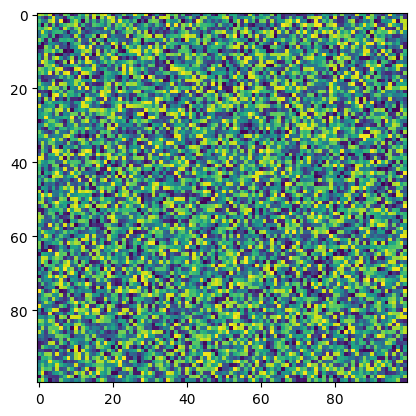

In [ ]:
hdul = fits.open('random_image.fits')
PrimaryHDU = hdul[0]

# Inspect the Header cards.
print("Header Cards")
for i in PrimaryHDU.header:
  print(i, PrimaryHDU.header[i])

# Display the data
print("Data")
data = PrimaryHDU.data
print(data)

hdul.close()

# Visualize the data
import matplotlib.pyplot as plt
plt.imshow(data)
plt.show()

If you do not need to open the FITS header, you can bypass the previous steps and use the Astropy shortcut to obtain the data stored in the FITS:

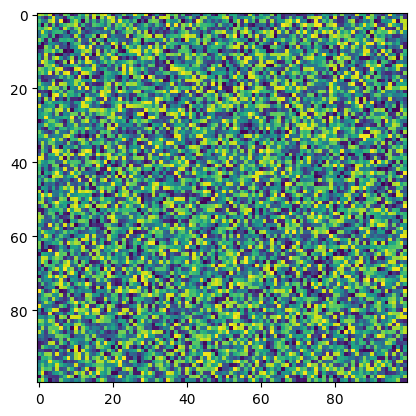

In [ ]:
data = fits.getdata('random_image.fits')
plt.imshow(data)

##<font color='red'> Manipulating FITS files

Raw astronomical images are stored in FITS files. However, before these images can be used for direct measurements, they must be calibrated and corrected.

These processes typically generate modified images, which are also stored in FITS format. These modified images contain the original data, along with additional information that helps the reader understand the calibration and correction steps that have been applied.

Additionally, we may want to save some measurements or table without loosing the image itself.

These tasks can be done by **manupulating** the FITS file.

###<font color='red'> Example

Suppose that at the end of the calibration process, we obtain an image called `modified_image`, which is a complex function of the `original_image`. We can save this image, along with the original and any preliminary analysis (`analysis_table`), using the following code:

In [ ]:
from astropy.io import fits
from astropy.table import Table
import numpy as np

# Step 1: Open and read the FITS file.
hdul = fits.open('random_image.fits')
PrimaryHDU = hdul[0]
original_image = PrimaryHDU.data

# Step 2: Perform some operations on the data (example: simple operation)
modified_image = data * 2  # Example: multiplying the data by 2

# Step 3: Create a new table with the analysis (example: generate a simple table)
# For this, we'll create an example table based on the data's statistics
mean_value = np.mean(modified_image)
std_dev = np.std(modified_image)
analysis_table = Table([['Mean', 'StdDev'], [mean_value, std_dev]],
                        names=('Metric', 'Value'))

# Step 4: Prepare the modified data and table for writing to a new FITS file
# Create new HDUs for the modified data and the analysis table
modified_hdu = fits.ImageHDU(modified_image, header=PrimaryHDU.header)
table_hdu = fits.BinTableHDU(analysis_table)

# Write everything to a new FITS file
hdul_new = fits.HDUList([PrimaryHDU, modified_hdu, table_hdu])
hdul_new.writeto('output_file.fits', overwrite=True)  # This will overwrite if the file exists

print("FITS file successfully processed and saved!")

FITS file successfully processed and saved!


## <font color='pink'> Exercise 2: Open the previous complex FITS file:

1) Use `AstroPy` to open the FITS file produced by the previous code. Read the data and the Table contained in the file.

2) Plot the image data contained in the file

## <font color='pink'> Exercise 3: Opening a real Astronomical Image </font>


1.   Using the following lines of code, download the FITS file http://data.astropy.org/tutorials/FITS-images/HorseHead.fits:


```
from astropy.utils.data import download_file
image_file = download_file('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits', cache=True )    
```

*Note that ```image_file``` now points to the file. Use this new variable as the pointer to the file.*


2. Inspect the FITS file using `astropy`. In particular, check the `header`, and understand the type of data contained in the file. Is it an image? Is it a Table? Are there extensions?

3. If this is an image, how many pixels are there in the horizontal and vertical direction?

4. Display the data contained in the FITS

5. See the histogram of the image, and use this information to enhance the contrast of the image using the `plt.imshow` function together with `vmin` and `vmax` parameters.

6. Rotate the image by 90 degrees using the transpose method (T) (e.g., ```image.T```)

7. Save the rotated image together with the original image in a new FITS file

Optional: Apply filters to the image using `scipy.ndimage` and save the results on different FITS files